## 2.1

The inputs of the left population are : $w_{L \to L}(x_{Li}, x_{Lj}) = \cos(x_{Li} + \theta - x_{Lj})$ and $w_{R \to L}(x_{Li}, x_{Rj}) = \cos(x_{Li} + \theta - x_{Rj})$

$I = J \left( \cos(x_{Li} + \theta) \sum_{j=1}^{N} \cos( x_{Lj}) S_{Lj}(t) + \sin(x_{Li} + \theta) \sum_{j=1}^{N} \sin(x_{Lj}) S_{Lj}(t) \right) + J \left( \cos(x_{Li} + \theta) \sum_{j=1}^{N} \cos(x_{Rj}) S_{Rj}(t) + \sin(x_{Li} + \theta) \sum_{j=1}^{N} \sin(x_{Rj}) S_{Rj}(t) \right)$

The inputs of the right population are : $w_{R \to R}(x_{Ri}, x_{Rj}) = \cos(x_{Ri} - \theta - x_{Rj})$ and $w_{L \to R}(x_{Ri}, x_{Lj}) = \cos(x_{Ri} - \theta - x_{Lj})$

$I = J \left( \cos(x_{Ri} - \theta) \sum_{j=1}^{N} \cos(x_{Rj}) S_{Rj}(t) + \sin(x_{Ri}- \theta) \sum_{j=1}^{N} \sin(x_{Rj}) S_{Rj}(t) \right) + J \left( \cos(x_{Ri} - \theta)) \sum_{j=1}^{N} \cos(x_{Lj}) S_{Lj}(t) + \sin(x_{Ri}- \theta) \sum_{j=1}^{N} \sin(x_{Lj}) S_{Lj}(t) \right)$



## 2.2

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys
sys.path.append('./src')

import simulation as sim
import constant as ct
from TwoPopulationSimulation import TwoPopulationSimulation


In [19]:
# fix seed
np.random.seed(1)

100%|██████████| 9999/9999 [00:03<00:00, 2771.09it/s]


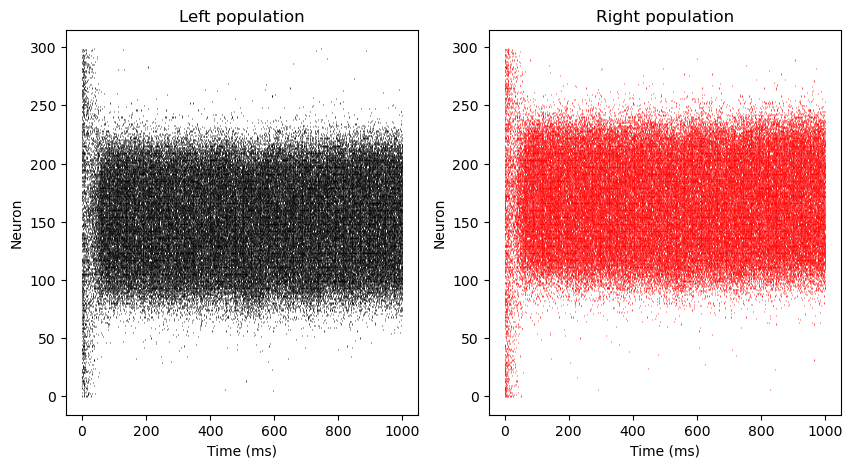

In [20]:
J = 3
theta = 10*np.pi/180

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

network = TwoPopulationSimulation(J = J, theta = theta)

hL,sL, hR, sR = network.simulation(initial_voltage=network.uniform_voltage)
sL1, sR1 = sim.bins_spike(sL, 1), sim.bins_spike(sR, 1)

spike_timesL = [np.where(sL1.T[i] !=0)[0] for i in range(ct.N)]
spike_timesR = [np.where(sR1.T[i] !=0)[0] for i in range(ct.N)]

ax[0].eventplot(spike_timesL, orientation='horizontal', color='black', linewidth=0.5)
ax[1].eventplot(spike_timesR, orientation='horizontal', color='red', linewidth=0.5)
ax[0].set_title(f'Left population')
ax[1].set_title(f'Right population')
ax[0].set_xlabel('Time (ms)')
ax[1].set_xlabel('Time (ms)')
ax[0].set_ylabel("Neuron")
ax[1].set_ylabel("Neuron")
plt.show()
    

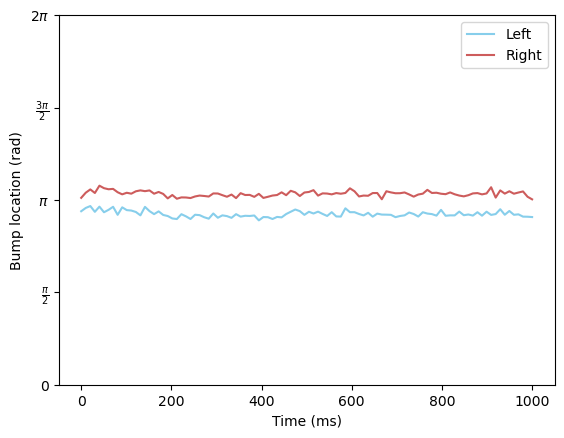

In [37]:
sL10 = sim.bins_spike(sL, 10)
sR10 = sim.bins_spike(sR, 10)


bump_locationL = sim.get_bump(sL10, N = ct.N)
bump_locationR = sim.get_bump(sR10, N = ct.N)

time = np.linspace(0, 1000, len(bump_locationL), endpoint=True)
plt.plot(time, bump_locationL, label='Left', color='SkyBlue')
plt.plot(time, bump_locationR, label='Right', color='IndianRed')
plt.xlabel('Time (ms)')
plt.ylabel('Bump location (rad)')
plt.yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.legend()
plt.show()

In [2]:
from scipy import stats
J = 3
theta = 10*np.pi/180

madL = []
madR = []

for i in tqdm(range(100)):

    network = TwoPopulationSimulation(J = J, theta = theta)

    hL,sL, hR, sR = network.simulation(initial_voltage=network.centered_voltage)
    sL1, sR1 = sim.bins_spike(sL, 1), sim.bins_spike(sR, 1)

    spike_timesL = [np.where(sL1.T[i] !=0)[0] for i in range(ct.N)]
    spike_timesR = [np.where(sR1.T[i] !=0)[0] for i in range(ct.N)]

    sL10 = sim.bins_spike(sL, 10)
    sR10 = sim.bins_spike(sR, 10)

    bump_locationL = sim.get_bump(sL10, N = ct.N)
    bump_locationR = sim.get_bump(sR10, N = ct.N)

    madL.append(stats.median_abs_deviation(bump_locationL))
    madR.append(stats.median_abs_deviation(bump_locationR))

# print(f'MAD for left population: {madL}')
# print(f'MAD for right population: {madR}')

100%|██████████| 100/100 [07:22<00:00,  4.42s/it]


In [9]:
np.max(madL)

0.130584649480034

In [10]:
np.max(madR)


0.12856190915323285

[]

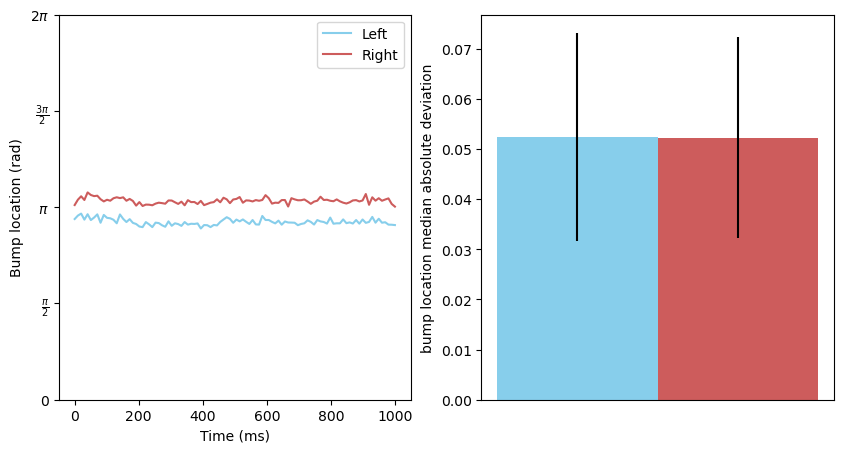

In [50]:
#cvreates a 1x2 grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(10,5))

time = np.linspace(0, 1000, len(bump_locationL), endpoint=True)
ax[0].plot(time, bump_locationL, label='Left', color='SkyBlue')
ax[0].plot(time, bump_locationR, label='Right', color='IndianRed')
ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Bump location (rad)')
ax[0].set_yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
ax[0].legend()

ax[1].bar(1-0.1,np.mean(madL), 0.2, yerr=np.std(madL), label='Left', color='SkyBlue')
ax[1].bar(1.1,np.mean(madR), 0.2, yerr=np.std(madR), label='Right', color='IndianRed')
ax[1].set_ylabel('bump location median absolute deviation')


#remove x ticks
ax[1].set_xticks([])


In [9]:
# we expect the absolute mean bump location difference to be 20° because theta is 10°
print(np.abs(np.mean(bump_locationL)-np.mean(bump_locationR))/np.pi*180)

19.79837380259302


## 2.3

In [7]:
np.random.seed(1)

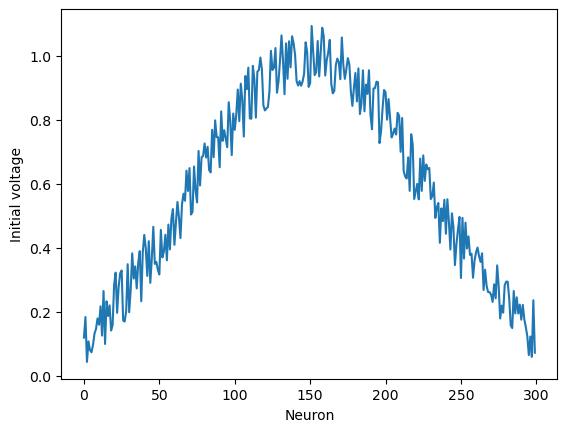

In [8]:
initial_voltage = np.linspace(0, 1, ct.N)
initial_voltage = 1 / (0.25*np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((initial_voltage - 0.5) / 0.25) ** 2)
initial_voltage = initial_voltage / np.max(initial_voltage)
initial_voltage += np.random.uniform(-0.1, 0.1, ct.N) # pas obligé d'apres l'assistant !

plt.plot(initial_voltage)
plt.xlabel('Neuron')
plt.ylabel('Initial voltage')
plt.show()

  0%|          | 0/9999 [00:00<?, ?it/s]

100%|██████████| 9999/9999 [00:01<00:00, 7147.74it/s]


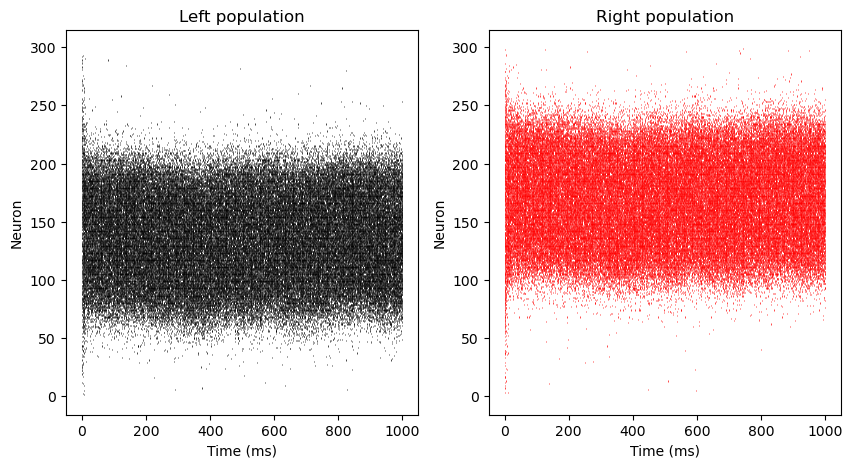

In [9]:
J = 3
theta = 20*np.pi/180

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

network = TwoPopulationSimulation(J = J, theta = theta)

hL,sL, hR, sR = network.simulation(initial_voltage=network.centered_voltage)

sL1, sR1 = sim.bins_spike(sL, 1), sim.bins_spike(sR, 1)
spike_timesL = [np.where(sL1.T[i] !=0)[0] for i in range(ct.N)]
spike_timesR = [np.where(sR1.T[i] !=0)[0] for i in range(ct.N)]

ax[0].eventplot(spike_timesL, orientation='horizontal', color='black', linewidth=0.5)
ax[1].eventplot(spike_timesR, orientation='horizontal', color='red', linewidth=0.5)
ax[0].set_title(f'Left population')
ax[1].set_title(f'Right population')
ax[0].set_xlabel('Time (ms)')
ax[1].set_xlabel('Time (ms)')
ax[0].set_ylabel("Neuron")
ax[1].set_ylabel("Neuron")
plt.show()
    

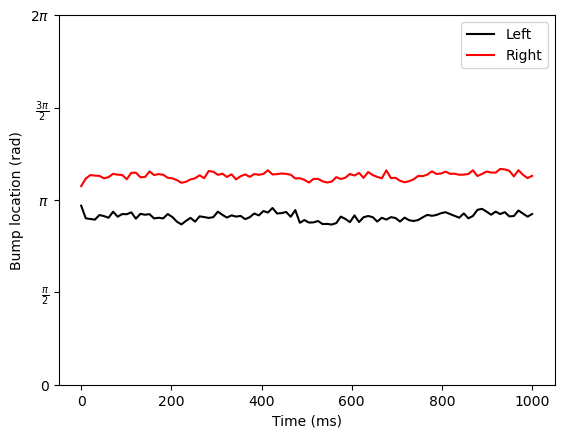

In [23]:
sL10 = sim.bins_spike(sL, 10)
sR10 = sim.bins_spike(sR, 10)

bump_locationL = sim.get_bump(sL10)
bump_locationR = sim.get_bump(sR10)
plt.plot(np.linspace(0, ct.T, len(bump_locationL)), bump_locationL, label='Left', color='black')
plt.plot(np.linspace(0, ct.T, len(bump_locationR)), bump_locationR, label='Right', color='red')
plt.xlabel('Time (ms)')
plt.ylabel('Bump location (rad)')
plt.yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.legend()
plt.show()

In [8]:
# we expect the mean bump location to be around 180°
print(np.mean(bump_locationL+bump_locationR)/np.pi*180)

183.61406625824426


## 2.4

100%|██████████| 9999/9999 [00:01<00:00, 8893.51it/s]
8it [00:14,  1.80s/it]


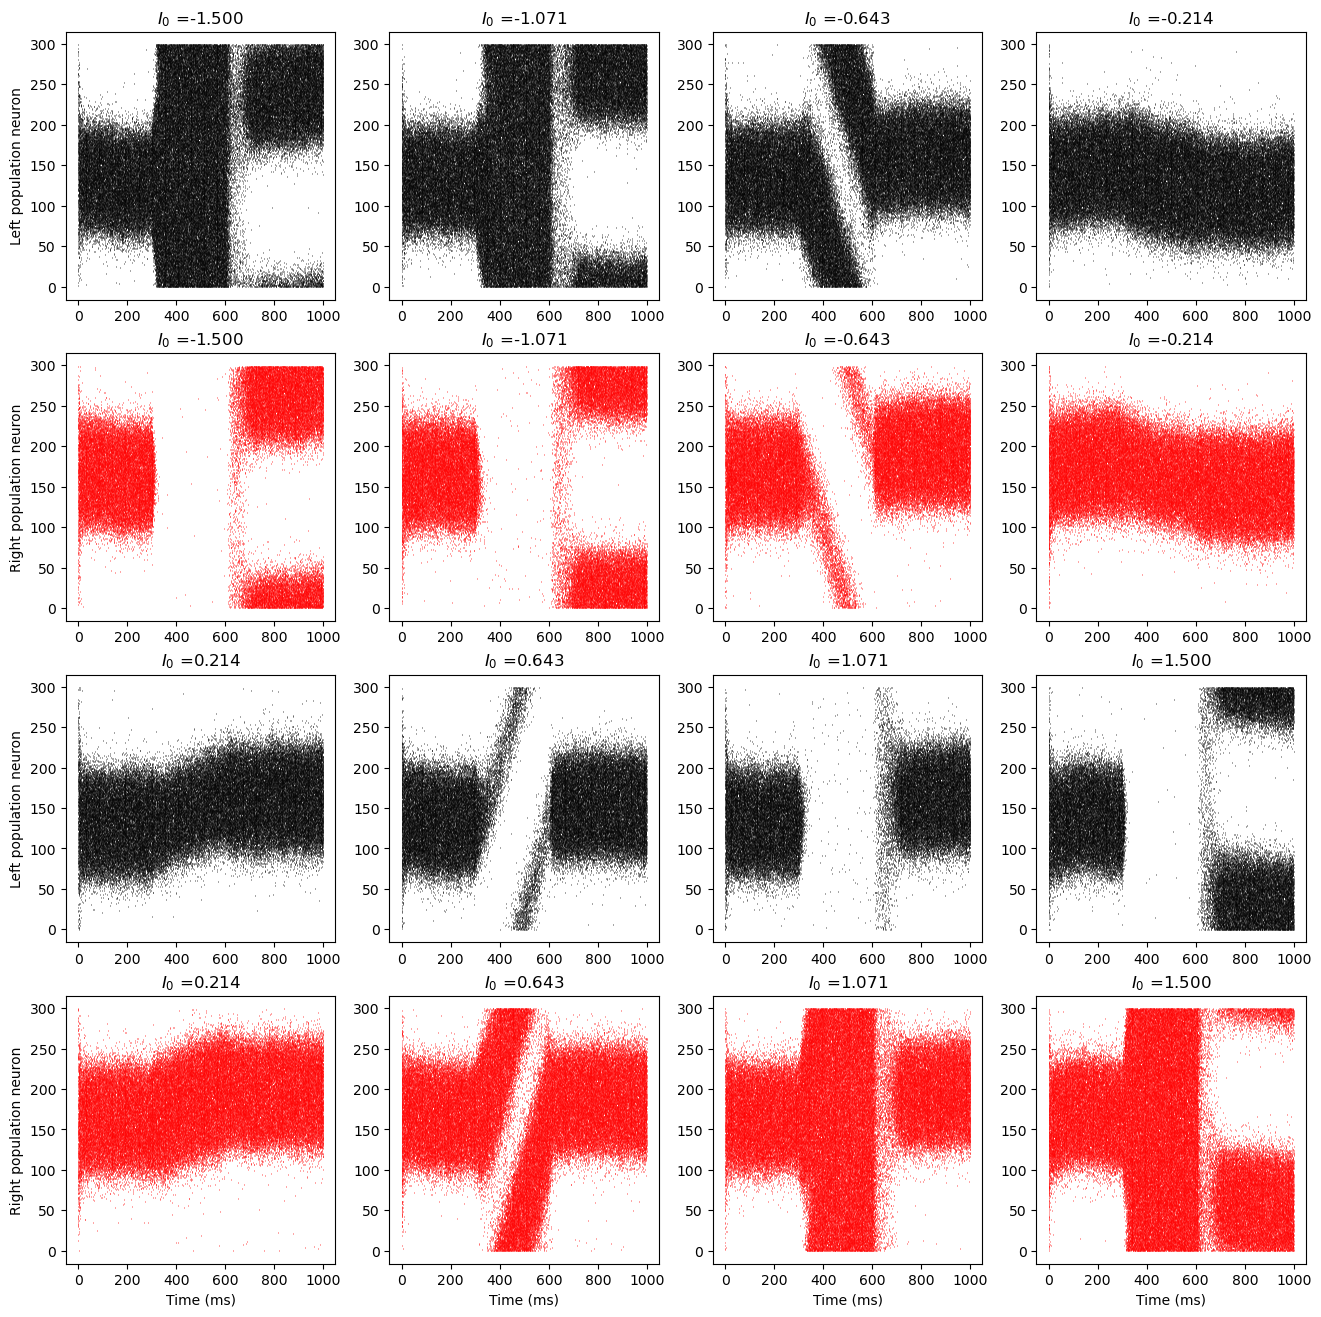

In [18]:
np.random.seed(0)

J = 3
theta = 20*np.pi/180
I0_values = np.linspace(-1.5, 1.5, 8)

fig, ax = plt.subplots(4, 4, figsize=(16, 16))

for i, I0 in tqdm(enumerate(I0_values)):
    x, y = i//4, i%4
    network = TwoPopulationSimulation(J = J, theta = theta, I0 = I0, I_ext = True)

    hL,sL, hR, sR = network.simulation(initial_voltage=network.centered_voltage)

    sL1, sR1 = sim.bins_spike(sL, 1), sim.bins_spike(sR, 1)
    spike_timesL = [np.where(sL1.T[i] !=0)[0] for i in range(ct.N)]
    spike_timesR = [np.where(sR1.T[i] !=0)[0] for i in range(ct.N)]

    ax[2*x, y].eventplot(spike_timesL, orientation='horizontal', color='black', linewidth=0.5)
    ax[2*x+1, y].eventplot(spike_timesR, orientation='horizontal', color='red', linewidth=0.5)
    ax[2*x, y].set_title(r'$I_0$ =' + f'{I0:.3f}')
    ax[2*x+1, y].set_title(r'$I_0$ =' + f'{I0:.3f}')

for i in range(2):
    ax[2*i, 0].set_ylabel("Left population neuron")
    ax[2*i+1, 0].set_ylabel("Right population neuron")

for i in range(4): ax[3, i].set_xlabel('Time (ms)')
    

plt.show()

In [20]:
np.random.seed(0)

J = 3
theta = 10*np.pi/180
I0_values = np.linspace(-1.5, 1.5, 51)

bump_L = []
bump_R = []

for i, I0 in tqdm(enumerate(I0_values)):
    network = TwoPopulationSimulation(J = J, theta = theta, I0 = I0, I_ext=True)

    hL,sL, hR, sR = network.simulation(initial_voltage=network.centered_voltage)

    sL = sim.bins_spike(sL, 10)
    sR = sim.bins_spike(sR, 10)
    
    bump_R.append(np.mean(sim.get_bump(sR, N = ct.N)))
    bump_L.append(np.mean(sim.get_bump(sL, N = ct.N)))


100%|██████████| 9999/9999 [00:01<00:00, 9411.60it/s]
51it [00:56,  1.11s/it]


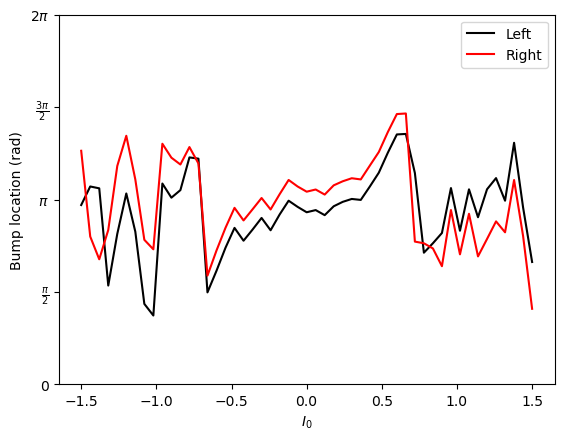

In [21]:
plt.plot(I0_values, bump_L, label='Left', color='black')
plt.plot(I0_values, bump_R, label='Right', color='red')
plt.legend()
plt.xlabel(r'$I_0$')
plt.ylabel('Bump location (rad)')
plt.yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.show()

Linear : between -0.5 nA and 0.5 nA.